*Project for Internship*

## Title- Bitcoin Price Prediction (using RNN, LSTM)

```
Done by- Pratik Lagaskar
Branch- Electronics and Telecommunication
College- MIT Academy of Engineering,Pune,Maharashtra
Semester - 3(2nd year)
```


Importing required Libraries


In [ ]:
import datetime
#Libraries to manipulate data
import numpy as np 
import math
import pandas as pd
#Libraries to visualize data
from matplotlib import pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dense, LSTM, Dropout, GRU, Bidirectional
from tensorflow.keras.optimizers import SGD
from keras.layers import LSTM

import os
import warnings
warnings.filterwarnings(action='ignore')
warnings.filterwarnings(action='ignore', category=DeprecationWarning)
warnings.filterwarnings(action='ignore', category=FutureWarning)

Lodaing dataset

In [ ]:
path = "/content/bitstampUSD_1-min_data_2012-01-01_to_2021-03-31.csv"
#while executing at your side, please add path to the same dataset on your machine.
df = pd.read_csv(path)
btc_index = data.index.ravel()
print(list(data.columns), "\nSHAPE ::", data.shape)
for i in data.columns:
    print(i, "::", data[i].dtype)

random = 123

data.describe()

['Timestamp', 'Open', 'High', 'Low', 'Close', 'Volume_(BTC)', 'Volume_(Currency)', 'Weighted_Price'] 
SHAPE :: (258769, 8)
Timestamp :: int64
Open :: float64
High :: float64
Low :: float64
Close :: float64
Volume_(BTC) :: float64
Volume_(Currency) :: float64
Weighted_Price :: float64


,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
count,2.587690e+05,258769.000000,258769.000000,258769.000000,258769.000000,258769.000000,258769.000000,258769.000000
mean,1.369669e+09,98.718789,98.801246,98.619939,98.711230,13.924749,1260.096558,98.709798
std,1.006773e+07,44.274144,44.310963,44.228730,44.269022,44.156227,4548.846143,44.268898
min,1.325318e+09,3.800000,3.800000,3.800000,3.800000,0.000000,0.000000,3.800000
25%,1.365972e+09,86.250000,86.320000,86.170000,86.250000,0.962672,69.265760,86.240000
50%,1.370734e+09,108.640000,108.820000,108.500000,108.650000,2.599271,200.000000,108.630000
75%,1.377196e+09,125.450000,125.500000,125.370000,125.460000,10.020629,777.680368,125.438149
max,1.382841e+09,259.340000,259.340000,259.340000,259.340000,2958.477574,258743.003580,259.340000


In [ ]:
def dateparse (time_in_secs):    
    return pytz.utc.localize(datetime.datetime.fromtimestamp(float(time_in_secs)))

df = pd.read_csv('/content/bitstampUSD_1-min_data_2012-01-01_to_2021-03-31.csv', parse_dates=[0], date_parser=dateparse, index_col='Timestamp')
df.shape

(4857377, 7)

In [ ]:
data.head()

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
0,1325317920,4.39,4.39,4.39,4.39,0.455581,2.000000,4.390000
478,1325346600,4.39,4.39,4.39,4.39,48.000000,210.720000,4.390000
547,1325350740,4.50,4.57,4.50,4.57,37.862297,171.380338,4.526411
548,1325350800,4.58,4.58,4.58,4.58,9.000000,41.220000,4.580000
1224,1325391360,4.58,4.58,4.58,4.58,1.502000,6.879160,4.580000


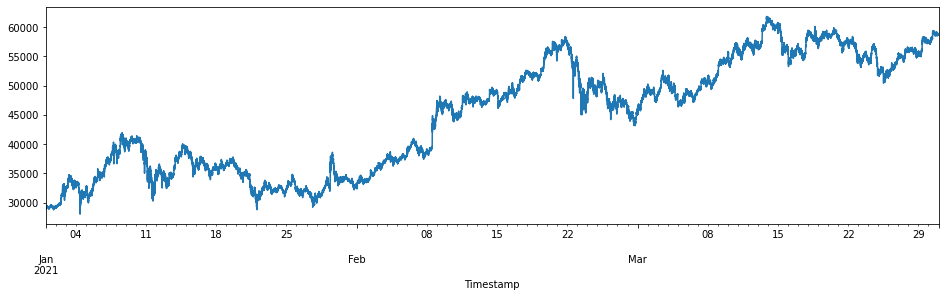

In [ ]:
df['Close']['2021':].plot(figsize=(16,4))

In [ ]:
df['Volume_(BTC)'].fillna(value=0, inplace=True)
df['Volume_(Currency)'].fillna(value=0, inplace=True)
df['Weighted_Price'].fillna(value=0, inplace=True)

# Forward fill those price values
df['Open'].fillna(method='ffill', inplace=True)
df['High'].fillna(method='ffill', inplace=True)
df['Low'].fillna(method='ffill', inplace=True)
df['Close'].fillna(method='ffill', inplace=True)

In [ ]:
df.isnull().sum().sum()

0

In [ ]:
df['Date'] = df.index.date
df_d = df.groupby('Date')['Close'].mean()
df_d = pd.DataFrame(df_d)
df_d.shape

(3376, 1)

In [ ]:
split = len(df_d) - int(len(df_d) * 0.8)
df_train = df_d.iloc[split:]
df_test = df_d.iloc[:split]

In [ ]:
step = 21

In [ ]:
def prepeare_data(df, step):
    data = []
    
    for i in range(len(df) - step):
        data.append((df[i: (i + step)]).values)
        
    return np.array(data)

In [ ]:
X_train = prepeare_data(df_train, step)
X_test = prepeare_data(df_test, step)

print("X_train shape= ", X_train.shape)
print("X_test shape= ", X_test.shape)

X_train shape=  (2679, 21, 1)
X_test shape=  (655, 21, 1)


In [ ]:
y_train = df_train.Close[step:].values
y_test = df_test.Close[step:].values

print("y_train shape= ", y_train.shape)
print("y_test shape= ", y_test.shape)

y_train shape=  (2679,)
y_test shape=  (655,)


In [ ]:
model = Sequential()
model.add(LSTM(units=128, activation='relu', dropout=0.2, input_shape=(21,1))) # Input layer
model.add(Dense(units=1)) # Output layer
model.compile(optimizer='adam', loss='mae') #rmse?
model.fit(X_train, y_train, epochs=30, batch_size=7)

Epoch 1/30
383/383 [==============================] - 6s 13ms/step - loss: 1387.0419
Epoch 2/30
383/383 [==============================] - 5s 12ms/step - loss: 755.0964
Epoch 3/30
383/383 [==============================] - 5s 13ms/step - loss: 655.9730
Epoch 4/30
383/383 [==============================] - 5s 13ms/step - loss: 1154.6938
Epoch 5/30
383/383 [==============================] - 5s 12ms/step - loss: 739.0359
Epoch 6/30
383/383 [==============================] - 5s 13ms/step - loss: 707.5724
Epoch 7/30
383/383 [==============================] - 5s 12ms/step - loss: 660.1955
Epoch 8/30
383/383 [==============================] - 5s 13ms/step - loss: 668.3041
Epoch 9/30
383/383 [==============================] - 5s 13ms/step - loss: 674.3217
Epoch 10/30
383/383 [==============================] - 5s 13ms/step - loss: 6478037.5000
Epoch 11/30
383/383 [==============================] - 5s 13ms/step - loss: 1409.0381
Epoch 12/30
383/383 [==============================] - 5s 13ms/step

In [ ]:
preds = model.predict(X_test)
preds.shape

(655, 1)

In [ ]:
mean_absolute_error(preds, y_test)

12.579773317105047

In [ ]:
def return_rmse(test,predicted):
    rmse = math.sqrt(mean_squared_error(test, predicted))
    print("The root mean squared error is {}.".format(rmse))
return_rmse(y_test, preds)

The root mean squared error is 19.214785554626904.


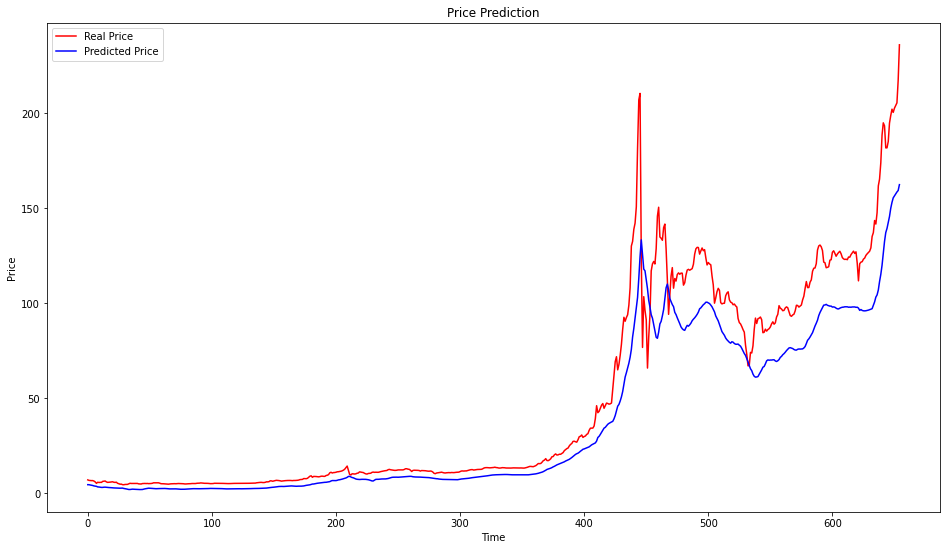

In [ ]:
def plot_predictions(test,predicted):
    fig, ax = plt.subplots(1, figsize=(16, 9))
    plt.plot(test, color='red',label='Real Price')
    plt.plot(predicted, color='blue',label='Predicted Price')
    plt.title('Price Prediction')
    plt.xlabel('Time')
    plt.ylabel('Price')
    plt.legend()
    plt.show()
plot_predictions(y_test,preds)

In [ ]:
targets = df_test['Close'][step:]
preds = model.predict(X_test).squeeze()

corr = np.corrcoef(targets, preds)[0][1]
print('R={:.2f}'.format(corr))

R=0.98


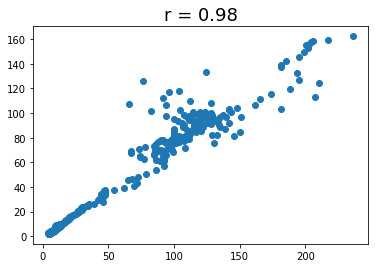

In [ ]:
from matplotlib import pyplot

pyplot.scatter(y_test, preds)
pyplot.title('r = {:.2f}'.format(corr), fontsize=18)
pyplot.show()